In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [202]:
df=pd.read_csv(r'C:\Users\ananyya srivastava\Desktop\bank.csv')

In [203]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [204]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [205]:
df.shape

(11162, 17)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [207]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [208]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [209]:
df['job']=df['job'].replace(['management','admin.'],'whitecollar')
df['job']=df['job'].replace(['housemaid','technician'],'pinkcollar')
df['job']=df['job'].replace(['retired','students','unemployed','unknown','services'],'others')

In [210]:
df['job'].value_counts()

whitecollar      3900
others           2128
pinkcollar       2097
blue-collar      1944
self-employed     405
student           360
entrepreneur      328
Name: job, dtype: int64

In [211]:
mapping={'single':0,'married':1,'divorced':2}
df['is_marital']=df['marital'].map(mapping)

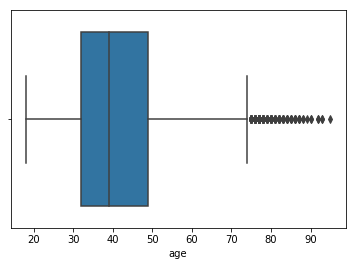

In [212]:
sns.boxplot(x=df.age)

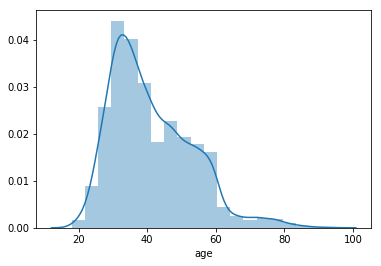

In [213]:
sns.distplot(df.age,bins=20)

In [214]:
df.groupby('deposit').marital.value_counts()

deposit  marital 
no       married     3596
         single      1606
         divorced     671
yes      married     2755
         single      1912
         divorced     622
Name: marital, dtype: int64

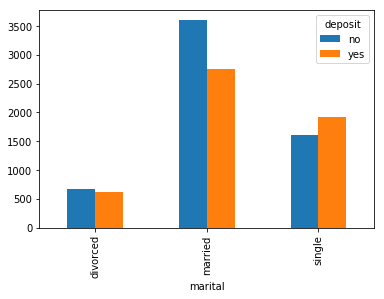

In [215]:
t1=pd.crosstab(df.marital,df.deposit)
t1.plot(kind='bar')

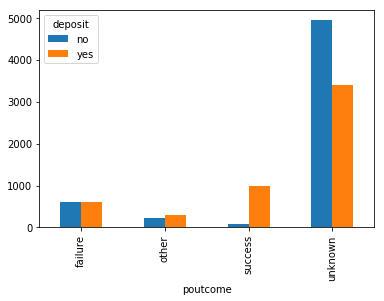

In [216]:
t2=pd.crosstab(df.poutcome,df.deposit)
t2.plot(kind='bar')

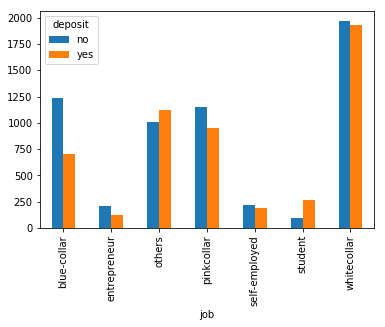

In [217]:
t3=pd.crosstab(df.job,df.deposit)
t3.plot(kind='bar')

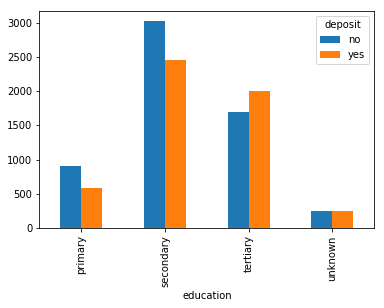

In [218]:
t4=pd.crosstab(df.education,df.deposit)
t4.plot(kind='bar')

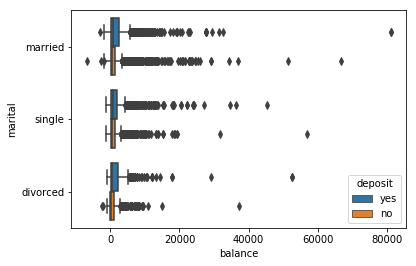

In [219]:
sns.boxplot(x='balance',y='marital',data=df,hue='deposit')
plt.show()

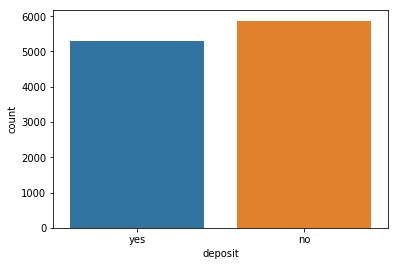

In [220]:
sns.countplot(x='deposit', data=df, label='Count')

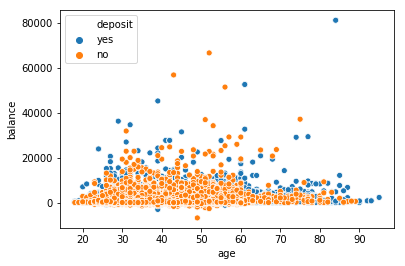

In [221]:
sns.scatterplot(x='age', y='balance',hue='deposit', data=df)

In [222]:
c=df.corr()
print(c)

                 age   balance       day  duration  campaign     pdays  \
age         1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774   
balance     0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411   
day        -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232   
duration    0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392   
campaign   -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726   
pdays       0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000   
previous    0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272   
is_marital  0.442782  0.002138  0.003642 -0.006781  0.030794 -0.031200   

            previous  is_marital  
age         0.020169    0.442782  
balance     0.030805    0.002138  
day        -0.058981    0.003642  
duration   -0.026716   -0.006781  
campaign   -0.049699    0.030794  
pdays       0.507272   -0.031200  
previous    1.000000   -0.031281  
is_marital -0.031281    1.000000  


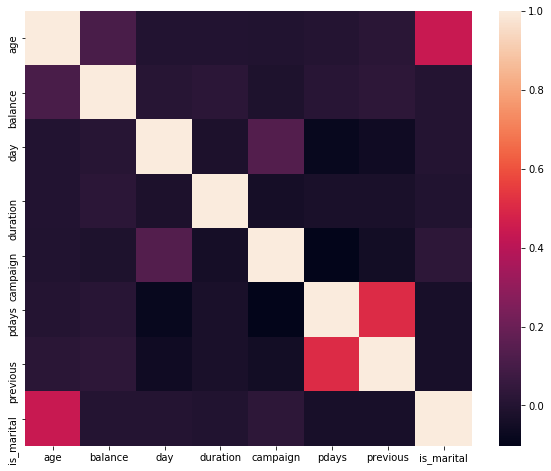

In [223]:
plt.figure(figsize=(10,8))
sns.heatmap(c)

In [224]:
cov1=df.cov()
print(cov1)

                    age       balance         day       duration    campaign  \
age          141.928366  4.315184e+03   -0.076486       0.782547   -0.171159   
balance     4315.183833  1.040329e+07  284.299484   25120.222216 -121.985317   
day           -0.076486  2.842995e+02   70.908854     -54.110259    3.140457   
duration       0.782547  2.512022e+04  -54.110259  120498.116170  -39.268069   
campaign      -0.171159 -1.219853e+02    3.140457     -39.268069    7.409704   
pdays          3.593995  6.107664e+03  -70.730655   -1034.115689  -30.411886   
previous       0.550713  2.277330e+02   -1.138351     -21.255941   -0.310076   
is_marital     3.299801  4.314776e+00    0.019186      -1.472516    0.052436   

                   pdays    previous  is_marital  
age             3.593995    0.550713    3.299801  
balance      6107.664002  227.733044    4.314776  
day           -70.730655   -1.138351    0.019186  
duration    -1034.115689  -21.255941   -1.472516  
campaign      -30.411886

In [225]:
map1={'yes':1,'no':0,'Yes':1,'No':0}
df['deposits']=df['deposit'].map(map1)

In [226]:
df['house']=df['housing'].map(map1)
df['loans']=df['loan'].map(map1)

In [227]:
map2={'secondary':0,'primary':1,'tertiary':2,'unknown':3}
df['educations']=df['education'].map(map2)

In [228]:
df.drop(['contact','month','day'],axis=1,inplace=True)

In [229]:
df.groupby('deposit').marital.value_counts()

deposit  marital 
no       married     3596
         single      1606
         divorced     671
yes      married     2755
         single      1912
         divorced     622
Name: marital, dtype: int64

In [230]:
df.groupby('deposit').poutcome.value_counts()

deposit  poutcome
no       unknown     4940
         failure      610
         other        230
         success       93
yes      unknown     3386
         success      978
         failure      618
         other        307
Name: poutcome, dtype: int64

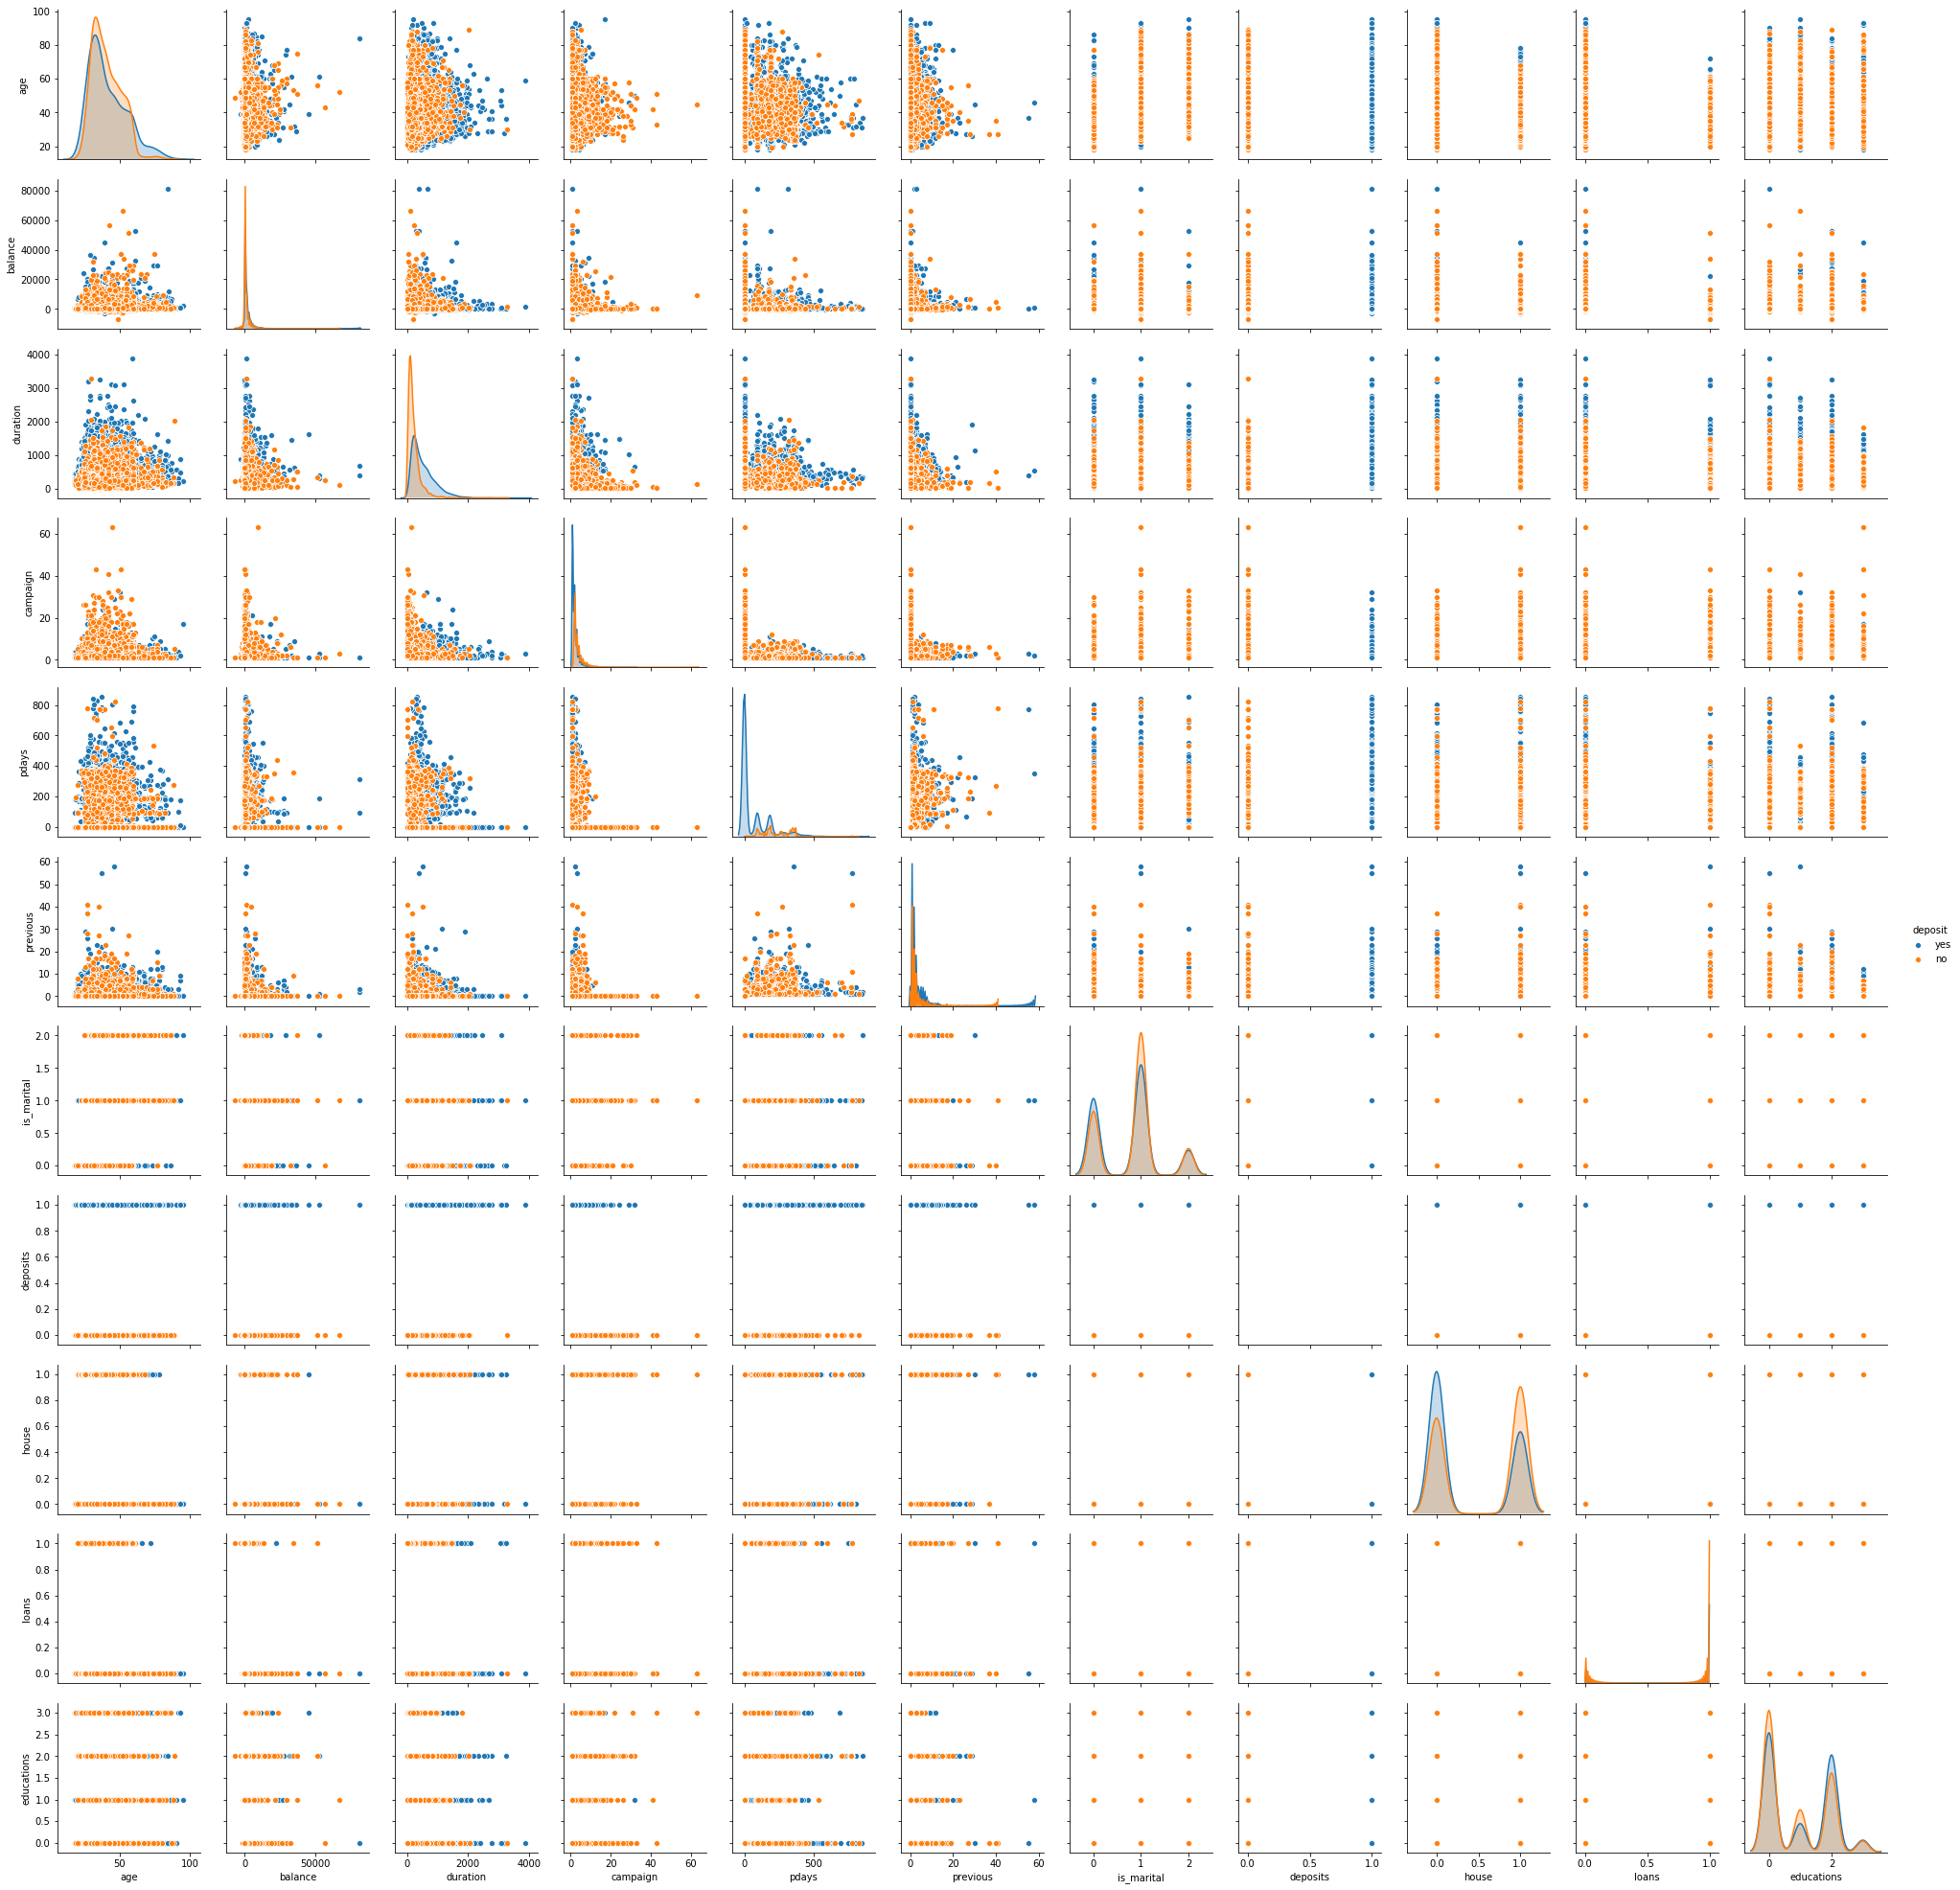

In [231]:
sns.pairplot(df,hue='deposit')
plt.show()

In [232]:
mapp={'whitecollar':0,'blue-collar':1,'technician':2,'others':3,'pinkcollar':4,'self-employed':5,'entrepreneur':6}
df['is_jobs']=df['job'].map(mapp)

In [178]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,is_marital,deposits,house,loans,educations,is_jobs
0,59,whitecollar,married,secondary,no,2343,yes,no,1042,1,-1,0,unknown,yes,1,1,1,0,0,0.0
1,56,whitecollar,married,secondary,no,45,no,no,1467,1,-1,0,unknown,yes,1,1,0,0,0,0.0
2,41,pinkcollar,married,secondary,no,1270,yes,no,1389,1,-1,0,unknown,yes,1,1,1,0,0,4.0
3,55,others,married,secondary,no,2476,yes,no,579,1,-1,0,unknown,yes,1,1,1,0,0,3.0
4,54,whitecollar,married,tertiary,no,184,no,no,673,2,-1,0,unknown,yes,1,1,0,0,2,0.0


In [179]:
df.drop(['job','marital','education','loan','housing','deposit'],axis=1,inplace=True)

In [180]:
df.head()

,age,default,balance,duration,campaign,pdays,previous,poutcome,is_marital,deposits,house,loans,educations,is_jobs
0,59,no,2343,1042,1,-1,0,unknown,1,1,1,0,0,0.0
1,56,no,45,1467,1,-1,0,unknown,1,1,0,0,0,0.0
2,41,no,1270,1389,1,-1,0,unknown,1,1,1,0,0,4.0
3,55,no,2476,579,1,-1,0,unknown,1,1,1,0,0,3.0
4,54,no,184,673,2,-1,0,unknown,1,1,0,0,2,0.0


In [181]:
map5={'failure':0,'success':1,'unknown':2,'other':3}
df['outcome']=df['poutcome'].map(map5)

In [182]:
df.head()

,age,default,balance,duration,campaign,pdays,previous,poutcome,is_marital,deposits,house,loans,educations,is_jobs,outcome
0,59,no,2343,1042,1,-1,0,unknown,1,1,1,0,0,0.0,2
1,56,no,45,1467,1,-1,0,unknown,1,1,0,0,0,0.0,2
2,41,no,1270,1389,1,-1,0,unknown,1,1,1,0,0,4.0,2
3,55,no,2476,579,1,-1,0,unknown,1,1,1,0,0,3.0,2
4,54,no,184,673,2,-1,0,unknown,1,1,0,0,2,0.0,2


In [183]:
df.drop(['poutcome'],axis=1,inplace=True)

In [184]:
df.head()

,age,default,balance,duration,campaign,pdays,previous,is_marital,deposits,house,loans,educations,is_jobs,outcome
0,59,no,2343,1042,1,-1,0,1,1,1,0,0,0.0,2
1,56,no,45,1467,1,-1,0,1,1,0,0,0,0.0,2
2,41,no,1270,1389,1,-1,0,1,1,1,0,0,4.0,2
3,55,no,2476,579,1,-1,0,1,1,1,0,0,3.0,2
4,54,no,184,673,2,-1,0,1,1,0,0,2,0.0,2


In [185]:
df['is_default']=df['default'].map(map1)

In [186]:
df.drop(['default'],axis=1,inplace=True)

In [187]:
df.head()

,age,balance,duration,campaign,pdays,previous,is_marital,deposits,house,loans,educations,is_jobs,outcome,is_default
0,59,2343,1042,1,-1,0,1,1,1,0,0,0.0,2,0
1,56,45,1467,1,-1,0,1,1,0,0,0,0.0,2,0
2,41,1270,1389,1,-1,0,1,1,1,0,0,4.0,2,0
3,55,2476,579,1,-1,0,1,1,1,0,0,3.0,2,0
4,54,184,673,2,-1,0,1,1,0,0,2,0.0,2,0


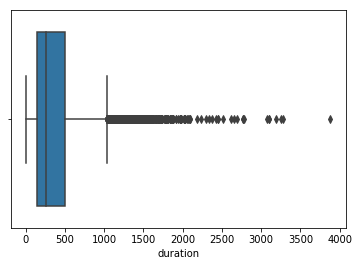

In [188]:
sns.boxplot(x=df.duration,data=df)

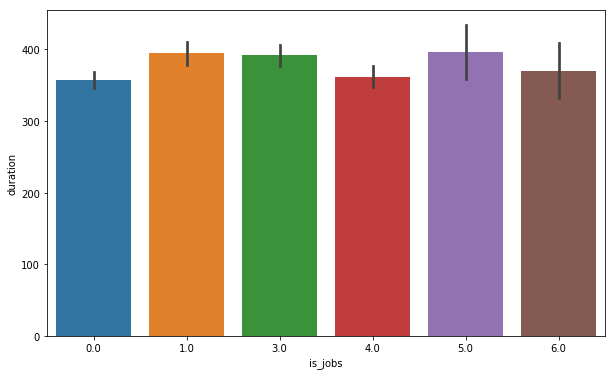

In [192]:
plt.figure(figsize = (10,6))
sns.barplot(x='is_jobs', y = 'duration', data = df)

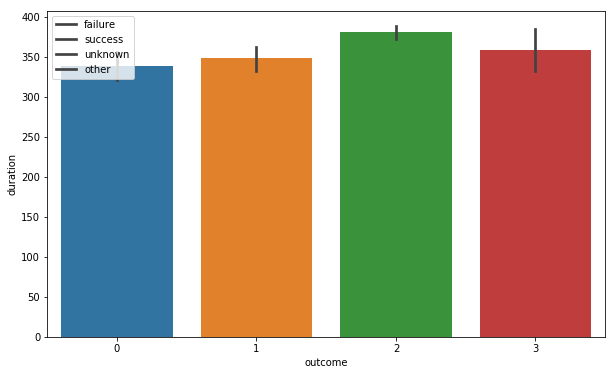

In [200]:
plt.figure(figsize = (10,6))
sns.barplot(x='outcome', y = 'duration', data =df)
plt.legend(['failure','success','unknown','other'],loc='upper left')

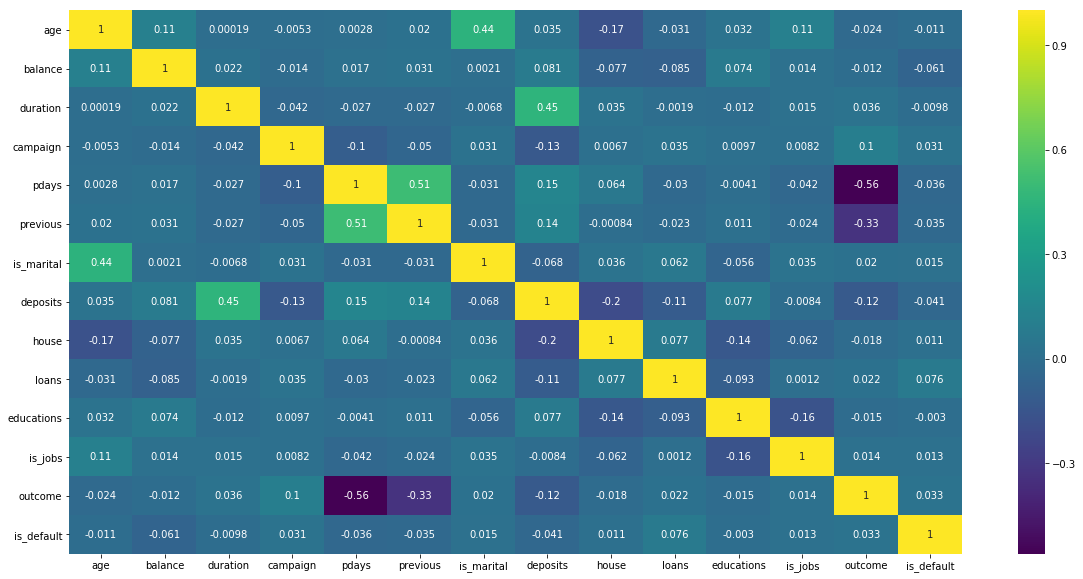

In [197]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')